# Related to figure 3c

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from collections import Counter

In [46]:
# Load pathway signature score of each bin
df = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/Kegg_addmodulescore.txt', index_col=0, sep='\t')
all_pathways = list(df.columns[-85:])
all_pathways.append('TLS_final')
df_tmp = df[all_pathways]
df_tls = df_tmp.groupby('TLS_final').agg('mean')[list(df.columns[-85:])]

In [47]:
df_group = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/TLS_group.1125.txt', index_col=0, sep='\t')
df_group = df_group[df_group['Group'].isin(['Mature', 'Deviating'])]

In [48]:
dic_group = dict(zip(df_group.index, df_group['Group']))
df_tls['group'] = df_tls.index.map(dic_group)
df_tls = df_tls.loc[~df_tls.group.isna(), ]

In [49]:
df_tls

,Glycolysis / Gluconeogenesis,Citrate cycle (TCA cycle),Pentose phosphate pathway,Pentose and glucuronate interconversions,Fructose and mannose metabolism,Galactose metabolism,Ascorbate and aldarate metabolism,Starch and sucrose metabolism,Amino sugar and nucleotide sugar metabolism,Pyruvate metabolism,...,Retinol metabolism,Porphyrin and chlorophyll metabolism,Ubiquinone and other terpenoid-quinone biosynthesis,Terpenoid backbone biosynthesis,Caffeine metabolism,"Neomycin, kanamycin and gentamicin biosynthesis",Metabolism of xenobiotics by cytochrome P450,Drug metabolism - cytochrome P450,Drug metabolism - other enzymes,group
TLS_final,,,,,,,,,,,,,,,,,,,,,
ST2740P_10,0.113813,0.000771,0.045486,-0.010472,0.053000,-0.027636,0.011773,-0.013543,-0.042823,0.015258,...,0.093209,-0.004190,0.057453,0.011412,0.035077,-0.004879,0.117712,0.124870,0.059361,Mature
ST2740P_17,0.112016,0.057423,0.040511,0.014669,0.062275,-0.033629,0.002772,-0.034314,-0.058478,0.028432,...,0.094701,0.017255,0.115936,-0.043465,-0.024354,-0.059454,0.097823,0.121422,0.038293,Deviating
ST2740P_26,0.095934,-0.003936,0.047885,-0.026171,0.021732,-0.047983,0.004081,-0.018674,-0.048859,0.014741,...,0.070508,-0.006035,0.073734,0.003084,0.060702,-0.003585,0.079020,0.087794,0.035613,Mature
ST2740P_3,0.111713,-0.008127,0.050654,-0.001637,0.056010,-0.016766,0.020698,-0.015347,-0.031055,0.012139,...,0.080130,0.022195,0.052529,-0.000453,0.059832,0.016572,0.112577,0.121675,0.043128,Mature
ST2740P_30,0.110055,0.031617,0.043431,0.030163,0.049625,-0.045961,0.047361,-0.018945,-0.035402,0.016541,...,0.121973,0.041095,0.038654,0.007809,0.096512,-0.015504,0.126644,0.149514,0.062762,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST2976T_29,-0.015986,-0.067342,-0.028991,0.011681,-0.002470,-0.004542,0.004213,-0.040832,-0.001676,-0.081178,...,-0.068600,-0.022766,-0.071467,0.049383,-0.067236,-0.045214,-0.076604,-0.092120,-0.035829,Deviating
ST2976T_31,-0.015681,-0.076098,-0.015805,0.034400,-0.004644,-0.003883,0.010187,-0.011314,0.009197,-0.069374,...,-0.069872,-0.018317,-0.057133,0.007268,-0.069183,0.007576,-0.041487,-0.069307,-0.005110,Mature
ST2976T_4,-0.022660,-0.070572,-0.038650,-0.018125,-0.018783,0.010674,-0.038497,-0.019758,-0.021202,-0.078864,...,-0.088454,-0.054793,-0.048672,0.023987,-0.061262,0.009485,-0.060528,-0.075943,-0.013770,Mature


In [50]:
# calculate the p-value of each kegg pathway between Mature and Deviating TLS
df_rst = pd.DataFrame(index=['p', 'diff', 'mature', 'deviating'])
for pathway in list(df.columns[-85:]):
    g0 = df_tls[pathway][df_tls['group']=='Mature']
    g1 = df_tls[pathway][df_tls['group']=='Deviating']
    p = ttest_ind(g0, g1)[1]
    diff = g1.mean() - g0.mean()
    cur_v = [p, diff, g0.mean(), g1.mean()]
    df_rst[pathway] = cur_v
df_rst = df_rst.T
df_rst

,p,diff,mature,deviating
Glycolysis / Gluconeogenesis,3.735437e-06,0.041550,0.007556,0.049106
Citrate cycle (TCA cycle),5.303595e-03,0.017962,-0.051193,-0.033231
Pentose phosphate pathway,7.020830e-09,0.042105,-0.027109,0.014996
Pentose and glucuronate interconversions,7.370254e-05,0.032138,-0.047365,-0.015226
Fructose and mannose metabolism,7.262497e-10,0.038771,-0.021940,0.016831
...,...,...,...,...
Caffeine metabolism,7.940551e-05,0.062259,-0.021990,0.040268
"Neomycin, kanamycin and gentamicin biosynthesis",6.323096e-01,0.003482,-0.002010,0.001472
Metabolism of xenobiotics by cytochrome P450,5.964022e-09,0.087296,-0.037224,0.050072
Drug metabolism - cytochrome P450,2.258803e-09,0.103938,-0.039327,0.064612


In [51]:
# sorted the result by p-value
df_rst = df_rst[(df_rst['p'] < 0.001) & (df_rst['diff'] > 0)]
df_rst = df_rst.sort_values('p')
df_rst['-log10(p-value)'] = -np.log10(df_rst['p'])
df_rst['x'] = range(df_rst.shape[0])

df_rst = df_rst.iloc[:30, ]
df_rst

,p,diff,mature,deviating,-log10(p-value),x
Tryptophan metabolism,1.046832e-10,0.053141,-0.068175,-0.015034,9.980123,0
Retinol metabolism,1.773707e-10,0.101492,-0.055973,0.045519,9.751118,1
Primary bile acid biosynthesis,2.047543e-10,0.089973,-0.096952,-0.006979,9.688767,2
Tyrosine metabolism,6.023505e-10,0.101372,-0.076896,0.024476,9.220151,3
Fructose and mannose metabolism,7.262497e-10,0.038771,-0.021940,0.016831,9.138914,4
Drug metabolism - cytochrome P450,2.258803e-09,0.103938,-0.039327,0.064612,8.646122,5
Steroid hormone biosynthesis,2.597892e-09,0.054453,-0.052484,0.001969,8.585379,6
Ubiquinone and other terpenoid-quinone biosynthesis,2.723912e-09,0.078295,-0.075028,0.003266,8.564807,7
Metabolism of xenobiotics by cytochrome P450,5.964022e-09,0.087296,-0.037224,0.050072,8.224461,8
Fatty acid degradation,6.606233e-09,0.091406,-0.066232,0.025174,8.180046,9


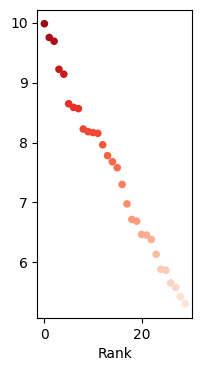

In [52]:
from mycolorpy import colorlist as mcp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = mcp.gen_color(cmap="Reds",n=20)[2:18]
my_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

plt.figure(figsize=(2, 4))
plt.scatter(x=df_rst['x'], y=df_rst['-log10(p-value)'], linewidth=0, s=30, c=df_rst['-log10(p-value)'], cmap=my_cmap)
plt.xlabel('Rank')
plt.show()